In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.linalg import eigh
from PIL import Image
from sklearn.decomposition import PCA
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


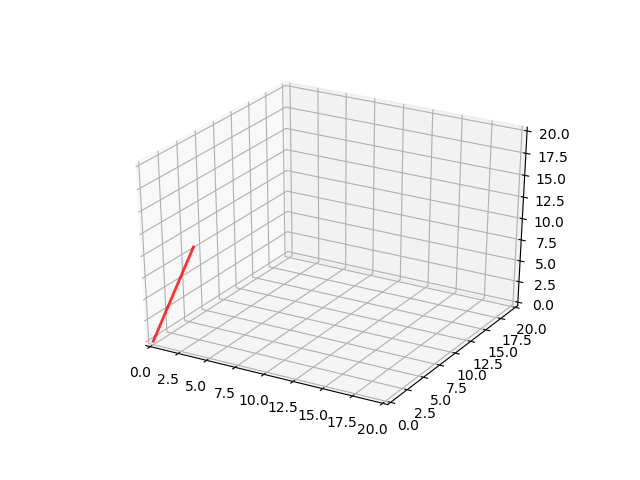

In [22]:
fig =plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.set_xlim([0,20])
ax.set_ylim([0,20])
ax.set_zlim([0,20])
ax.plot([0,0],[0,6],[0,8],color='red',alpha=0.8,lw=2)

In [5]:
data=[[0,0],[0,6],[0,8]]

In [7]:
a1=np.array(data)

In [8]:
a1

array([[0, 0],
       [0, 6],
       [0, 8]])

In [9]:
a2=a1*2

In [10]:
a2

array([[ 0,  0],
       [ 0, 12],
       [ 0, 16]])

<IPython.core.display.Javascript object>


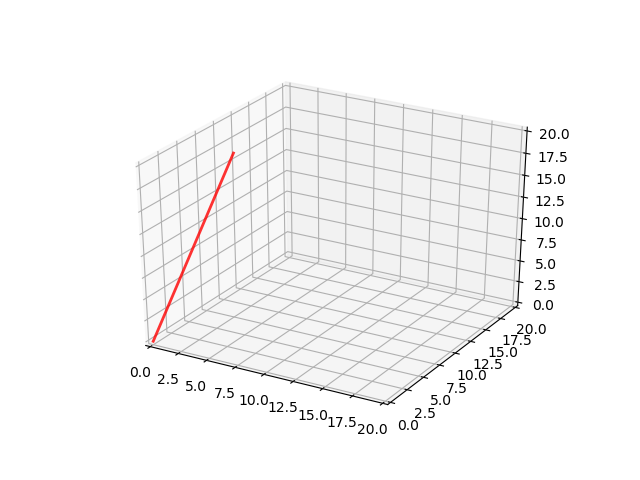

In [20]:
fig =plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.set_xlim([0,20])
ax.set_ylim([0,20])
ax.set_zlim([0,20])

ax.plot(a2[0],a2[1],a2[2],color='red',alpha=0.8,lw=2)

In [17]:
a3=a1+10

In [18]:
a3

array([[10, 10],
       [10, 16],
       [10, 18]])

<IPython.core.display.Javascript object>


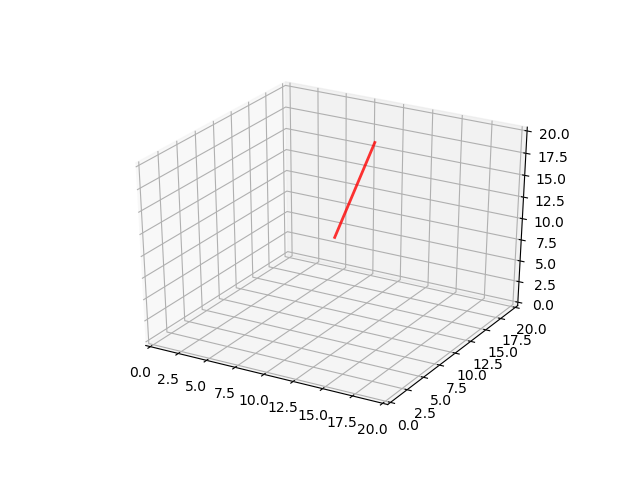

In [21]:
fig =plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.set_xlim([0,20])
ax.set_ylim([0,20])
ax.set_zlim([0,20])
ax.plot(a3[0],a3[1],a3[2],color='red',alpha=0.8,lw=2)

In [23]:
from numpy import linalg as la
A=np.array([[2,-1],[4,3]])
eigen_values,eigen_vec = la.eig(A)

In [24]:
eigen_vec

array([[-0.1118034 +0.4330127j, -0.1118034 -0.4330127j],
       [ 0.89442719+0.j       ,  0.89442719-0.j       ]])

In [26]:
eigen_vec.real

array([[-0.1118034 , -0.1118034 ],
       [ 0.89442719,  0.89442719]])

In [27]:
v=eigen_vec.real*2.5

In [28]:
eigen_values.real

array([2.5, 2.5])

In [29]:
v.T

array([[-0.2795085 ,  2.23606798],
       [-0.2795085 ,  2.23606798]])

<IPython.core.display.Javascript object>


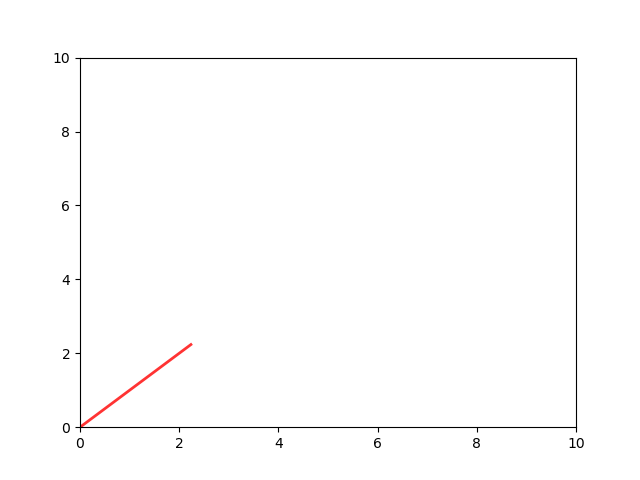

In [33]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.plot(v.T[0],v.T[1],color="r",alpha=0.8,lw=2)

In [34]:
v_trf = np.matmul(A,v)

In [35]:
v_trf

array([[-2.79508497, -2.79508497],
       [ 5.59016994,  5.59016994]])

<IPython.core.display.Javascript object>


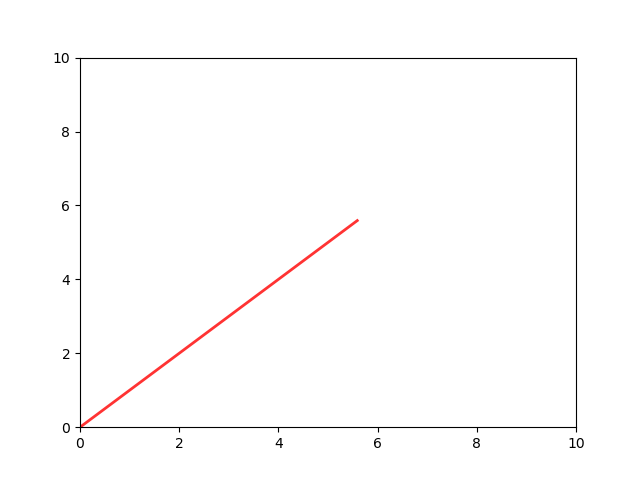

In [37]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.plot(v_trf.T[0],v_trf.T[1],color="r",alpha=0.8,lw=2)

In [38]:
df=pd.read_csv('C:\\Users\\om sai\\Downloads\\students.csv')

In [40]:
df.columns =['x','y','z']

<IPython.core.display.Javascript object>


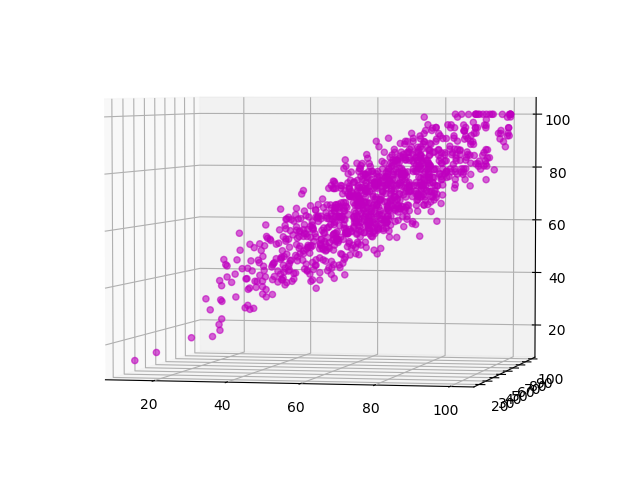

In [47]:
fig =plt.figure()
ax= Axes3D(fig)
ax.scatter(df['x'],df['y'],df['z'],color='m',alpha=0.6)
plt.show()

<IPython.core.display.Javascript object>


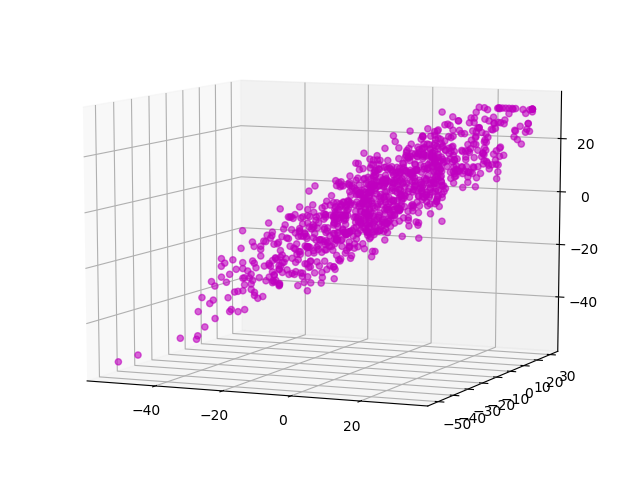

In [49]:
corrected_x=df['x']-np.mean(df['x'])
corrected_y=df['y']-np.mean(df['y'])
corrected_z=df['z']-np.mean(df['z'])
fig =plt.figure()
ax= Axes3D(fig)
ax.scatter(corrected_x,corrected_y,corrected_z,color='m',alpha=0.6)
plt.show()

In [50]:
corrected_df = pd.DataFrame(list(zip(corrected_x,corrected_y,corrected_z)))

In [51]:
cov=np.cov(corrected_df)

In [53]:
cov_df=pd.DataFrame(cov).head()

In [54]:
eigenvalues,eigenvectors=np.linalg.eig(cov)

In [55]:
eigenvalues=eigenvalues.real
eigenvectors=eigenvectors.real

In [56]:
eigenvectors

array([[-5.34475928e-02, -2.99874520e-02,  6.63887309e-04, ...,
        -6.44814622e-17,  4.91599144e-17,  4.91599144e-17],
       [-4.26121721e-02, -5.63534084e-02, -1.86669796e-02, ...,
         2.99113310e-06, -1.79897718e-06, -1.79897718e-06],
       [ 6.85199098e-03, -4.50027318e-03,  4.37934313e-03, ...,
        -2.83687493e-06,  1.70620066e-06,  1.70620066e-06],
       ...,
       [ 6.61524146e-04,  5.63416975e-02, -4.77372484e-03, ...,
         2.81971205e-04, -1.69587828e-04, -1.69587828e-04],
       [ 1.74666240e-02, -1.72493745e-02, -1.19111513e-02, ...,
         3.18677090e-04, -1.91664093e-04, -1.91664093e-04],
       [-4.42500479e-03,  4.90993932e-02,  6.59934255e-03, ...,
        -2.72968188e-04,  1.64173083e-04,  1.64173083e-04]])

In [57]:
idx=eigenvalues.argsort()

In [58]:
idx=idx[::-1]

In [60]:
eigenvalues=eigenvalues[idx]
eigenvectors=eigenvectors[:,idx]

In [61]:
y1=np.dot(eigenvectors,df)
y2=np.dot(eigenvectors,corrected_df)

In [67]:
out1=pd.DataFrame(y1)
out2=pd.DataFrame(y2)

In [68]:
out1.head()


,0,1,2
0,17.843218,19.277732,18.929240
1,-9.923227,-12.228836,-11.229976
2,-39.585466,-44.378608,-42.537441
3,78.713817,85.647739,83.319640
4,7.471886,4.783582,5.964666


In [71]:
out2.head()

,0,1,2
0,2.669043,3.521305,3.456046
1,0.224844,-1.691370,-0.881929
2,-2.611992,-5.986417,-4.835377
3,-2.923550,0.877846,0.073548
4,0.213715,-2.753094,-1.436533


<IPython.core.display.Javascript object>


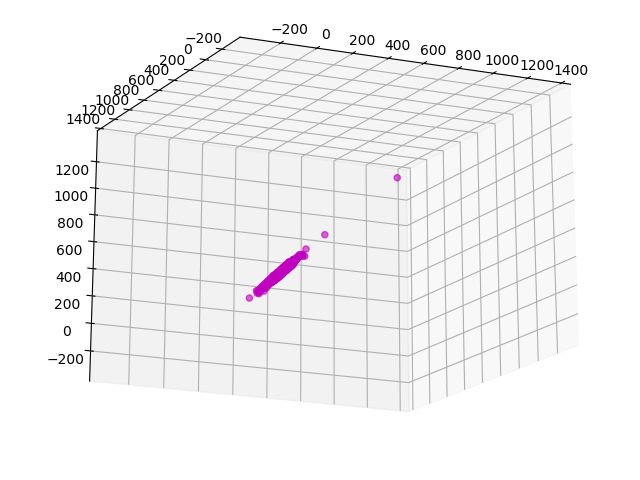

In [69]:
fig =plt.figure()
ax= Axes3D(fig)
ax.scatter(out1[0],out1[1],out1[2],color='m',alpha=0.6)
plt.show()

<IPython.core.display.Javascript object>


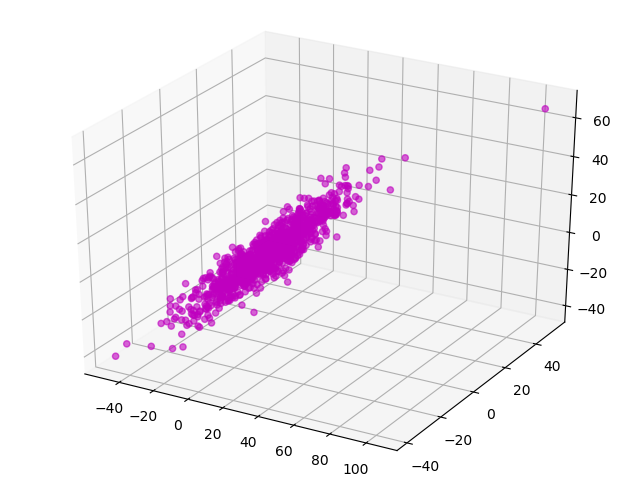

In [70]:
fig =plt.figure()
ax= Axes3D(fig)
ax.scatter(out2[0],out2[1],out2[2],color='m',alpha=0.6)
plt.show()

In [72]:
df

,x,y,z
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62
5,69,84,85
6,70,84,83
7,46,48,41
8,61,78,80
9,86,78,77


In [73]:
pca=PCA(n_components=2)

In [75]:
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [76]:
print(pca.components_[:,0:2])

[[-0.55798009 -0.57537087]
 [-0.82966911  0.37155866]]


In [77]:
print(pca.components_)

[[-0.55798009 -0.57537087 -0.59800216]
 [-0.82966911  0.37155866  0.41664534]]


In [78]:
print(pca.explained_variance_ratio_)

[0.90240474 0.08181807]


In [80]:
#### Picture PCA

tmp_img=np.array(Image.open('C:\\Users\\om sai\\Downloads\\1.jpeg','r'))

In [82]:
tmp_img.shape

(360, 480, 3)

In [83]:
pca_im=PCA

In [84]:
%matplotlib inline

In [86]:
from pylab import imread,subplot,imshow
A=imread('C:\\Users\\om sai\\Downloads\\1.jpeg','r')
A_mean=np.mean(A,axis=2)

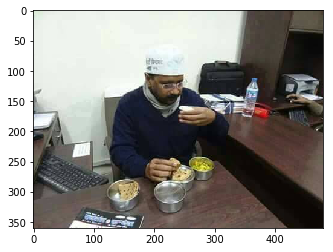

In [87]:
imshow(A)

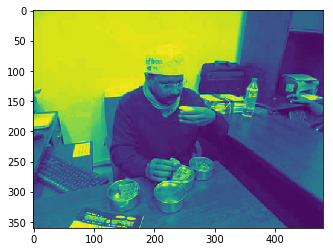

In [90]:
imshow(A_mean)

In [92]:
pca=PCA(n_components=50).fit(A_mean)

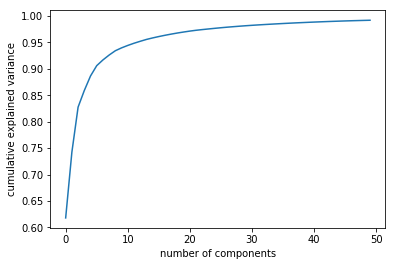

In [94]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');